In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# get the data
import pods, pandas as pd
data = pods.datasets.singlecell()
genes = data['Y']
labels = data['labels']
label_dict = dict(((i,l) for i,l in enumerate(labels)))
#print label_dict
N = genes.shape[0]
G = genes.shape[1]
genes.describe()
print genes.shape
stageCell = np.zeros(N)
stageN = np.zeros(N)
for i,l in enumerate(labels):
    stageCell[i] = int(l[:2])
    stageN[i] = np.log2(stageCell[i]) + 1

(437, 48)


In [4]:
# generate label legend
labelLegend = np.unique(labels)
v = np.zeros_like(labels)
for i,l in enumerate(labelLegend):
    idx = np.flatnonzero(labels==l)
    v[idx] = i

In [5]:
import cPickle as pickle
# From manifold load pseudotime, Y and labels
dictData = pickle.load( open( "data/guo_ssData.p", "rb" ) )
ptFull = dictData['pt']
print ptFull.shape


(437,)


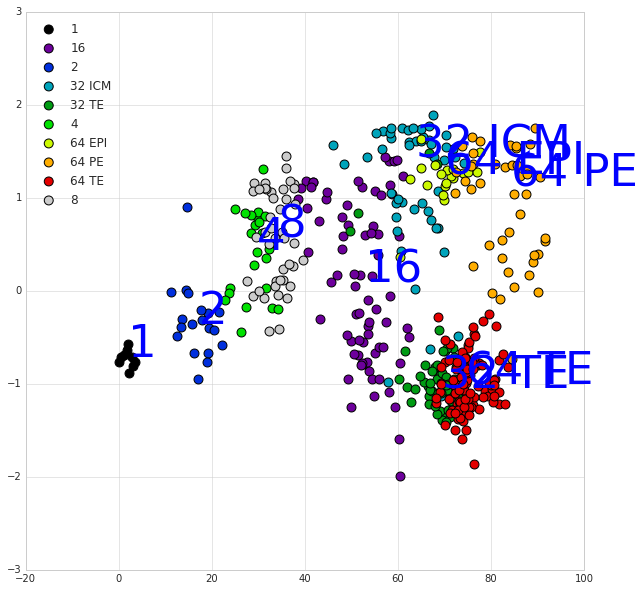

In [6]:
def plotGene(t,g):
    import matplotlib.cm as cm
    with plt.style.context('seaborn-whitegrid'):
        colors = cm.spectral(np.linspace(0, 1, len(labelLegend)))
        plt.figure(figsize=(10, 10))
        for lab,c in zip(labelLegend,colors):
            y1 = t[labels == lab]
            y2 = g[labels == lab]
            plt.scatter(y1,y2,label=lab, c=c,s=80)
            plt.text(np.median(y1),np.median(y2),lab, fontsize=45, color='blue')
        plt.legend(loc='upper left')
plotGene(ptFull, genes.Id2)

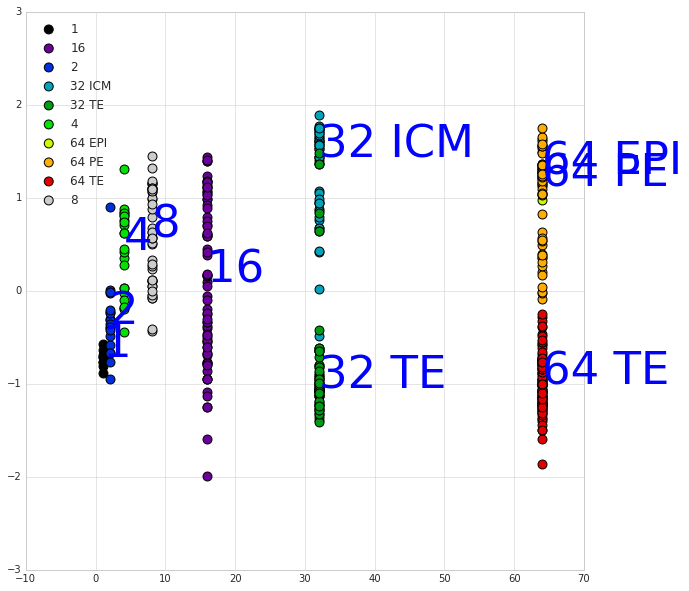

In [7]:
plotGene(stageCell, genes.Id2)

In [10]:
import time
import mouseQPCRModelSelection
t0 = time.time()
subsetSelection = 2
pt = stageCell[::subsetSelection].copy()
Y = genes.Id2.values[::subsetSelection,None].copy()    
print Y.shape
m,mV = mouseQPCRModelSelection.InitModels(pt,Y)
logVBBound, logLike = mouseQPCRModelSelection.DoModelSelectionRuns(m,mV,Bpossible=np.array([5, 10, 20., 30., 50., 60.]), strSaveState='rawData', \
    fSoftVBAssignment=True, fOptimizeHyperparameters = False, fReestimateMAPZ=True,\
    numMAPsteps = 10)
print 'Times=%g secs'%(time.time()-t0)    

(219, 1)
Branching kernel =====================
unnamed.branchkernelparam.kern.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
unnamed.branchkernelparam.kern.\u001blengthscales\u001b transform:+ve prior:None
[ 1.]
unnamed.branchkernelparam.\u001bBv\u001b transform:(none) prior:None [FIXED]
[[ 1.]]
unnamed.white.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
Initialise models: MAP =====================
model.kern.branchkernelparam.kern.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.kern.\u001blengthscales\u001b transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.\u001bBv\u001b transform:(none) prior:None [FIXED]
[[ 1.]]
model.kern.white.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
model.likelihood.\u001bvariance\u001b transform:+ve prior:None
[ 1.]

Initialise models: VB =====================
compiling tensorflow function...
done
============> B=[ 5.]
MAP assignment.
Performing MAP inference with B=[ 5.]


InvalidArgumentError: Expected begin[0] == 0 (got 0) and size[0] == 0 (got 1) when input.dim_size(0) == 0
	 [[Node: Slice_13 = Slice[Index=DT_INT32, T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/cpu:0"](Slice_12, Slice_13/begin, Slice_13/size)]]
Caused by op u'Slice_13', defined at:
  File "/home/mqbssaby/anaconda2/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/mqbssaby/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 589, in launch_instance
    app.start()
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-79f508135a59>", line 8, in <module>
    m,mV = mouseQPCRModelSelection.InitModels(pt,Y)
  File "mouseQPCRModelSelection.py", line 50, in InitModels
    m.CompileAssignmentProbability(fDebug=False,fMAP=True) # If hyperparameters are changed, this function should be called to reocmpute KChol
  File "AssignGPGibbsSingleLoop.py", line 145, in CompileAssignmentProbability
    self.make_tf_array(self._free_vars)
  File "/home/mqbssaby/python/GPflow/GPflow/param.py", line 300, in make_tf_array
    count += p.make_tf_array(X[count:])
  File "/home/mqbssaby/python/GPflow/GPflow/param.py", line 300, in make_tf_array
    count += p.make_tf_array(X[count:])
  File "/home/mqbssaby/python/GPflow/GPflow/param.py", line 141, in make_tf_array
    x_free = free_array[:self.size]
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 167, in _SliceHelper
    sliced = slice(tensor, indices, sizes)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 217, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1379, in _slice
    name=name)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 683, in apply_op
    op_def=op_def)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2154, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/mqbssaby/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1154, in __init__
    self._traceback = _extract_stack()
